In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


수면 패턴 시간 (x): [ 59.  64.  60.  65.  58.  90.  85.  67.  66.  61.  65.  60.  60.  66.
  60.  62.  64.  58.  65. 110. 143. 155. 155. 150. 141. 162. 138. 156.
 195. 165. 175. 210. 146. 144. 148. 150. 145. 145. 160. 155. 180. 196.
 200. 185. 207. 210. 185. 195. 190. 188. 202. 196. 190. 190. 194. 188.
 190. 192. 175. 200. 305. 210. 245. 238. 255. 250. 245. 240. 252. 247.
 244. 238. 240. 234. 197. 305. 362. 330. 324. 315. 316. 308. 312. 372.
 376. 362. 384. 352. 368. 452. 468. 447. 455. 450. 452. 540. 520. 512.
 516. 518.]
수면 패턴 주기 (y): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 7. 7. 7. 7. 7. 7. 8.
 8. 8. 8. 8.]
Mean Squared Error: 0.13
Final model parameters: w = 0.0157789494, b = -0.0968326888


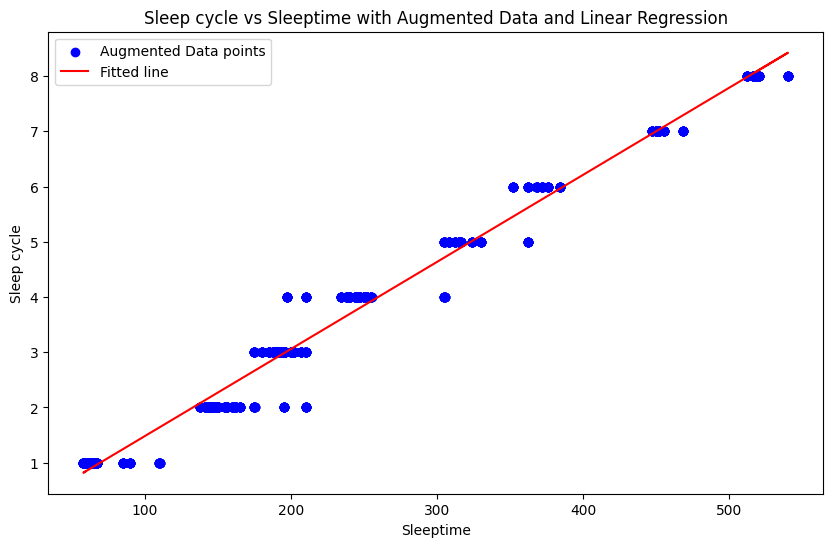

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# CSV 파일 읽기
df = pd.read_csv('/content/drive/MyDrive/sleep_pattern_demo.csv', encoding='cp949')

# 데이터 전처리
X = df['수면 패턴 시간'].values.astype(np.float64)
y = df['수면 패턴 주기'].values.astype(np.float64)

# 출력 확인
print("수면 패턴 시간 (x):", X)
print("수면 패턴 주기 (y):", y)

# x를 2D 배열로 변환
X = X.reshape(-1, 1)

# 데이터 증강
def augment_data(X, y, augmentation_factor=10, noise_level=0.05):
    X_augmented = []
    y_augmented = []

    for i in range(len(X)):
        X_augmented.append(X[i])
        y_augmented.append(y[i])

        for _ in range(augmentation_factor - 1):
            noise = np.random.normal(0, noise_level, size=X[i].shape)
            X_augmented.append(X[i] + noise)
            y_augmented.append(y[i])

    return np.array(X_augmented), np.array(y_augmented)

# 데이터 증강
X_augmented, y_augmented = augment_data(X, y, augmentation_factor=10, noise_level=0.05)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

# 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# 회귀 계수 및 절편
w = model.coef_[0]
b = model.intercept_

print(f"Final model parameters: w = {w:.10f}, b = {b:.10f}")

# 데이터와 회귀선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_augmented, y_augmented, color='blue', label='Augmented Data points')
plt.plot(X_augmented, model.predict(X_augmented), color='red', label='Fitted line')  # Linear regression line
plt.xlabel('Sleeptime')
plt.ylabel('Sleep cycle')
plt.title('Sleep cycle vs Sleeptime with Augmented Data and Linear Regression')
plt.legend()
plt.show()

In [ ]:
# 사용자 입력 및 예측
wanted_time = int(input("원하는 수면 시간을 분 단위로 입력해주세요: "))
limit_time = int(input("가장 많이 잘 수 있는 시간을 분 단위로 입력해주세요: "))

while True:
    mode = input("모드를 선택해주세요 - mode1<효율> mode2<최대 수면>: ")
    errorbefore = 1000
    errorafter = 1000
    beforetime = 0
    aftertime = 0
    modeword = ["효율", "최대 수면"]
    if mode in modeword:
        for i in range(1, 8, 1):
            remtime = (i - b) / w
            if remtime < wanted_time:
                error = wanted_time - remtime
                if error < errorbefore:
                    errorbefore = wanted_time - remtime
                    beforetime = remtime
            else:
                error = remtime - wanted_time
                if error < errorafter:
                    errorafter = remtime - wanted_time
                    aftertime = remtime
        if mode == "효율":
            if aftertime > limit_time:
                print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(beforetime))
            else:
                if errorafter > errorbefore:
                    print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(beforetime))
                else:
                    print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(aftertime))
            break
        elif mode == "최대 수면":
            if aftertime > limit_time:
                print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(beforetime))
            else:
                print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(aftertime))
            break
    else:
        print("다시 입력해주세요")

원하는 수면 시간을 분 단위로 입력해주세요: 360
가장 많이 잘 수 있는 시간을 분 단위로 입력해주세요: 400
모드를 선택해주세요 - mode1<효율> mode2<최대 수면>: 효율
당신의 최대 효율 수면 시간은 386.39028166249267분 입니다.
